In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# csv file

In [2]:
x=np.linspace(0, 1, 30)
y=x**2
z=np.sin(x*3*np.pi)/2-x+1

In [3]:
np.random.seed(1998)
yerr=np.random.normal(scale=y/10)
ydata=y+yerr

zerr=np.random.random(size=len(z))-0.5
zdata=z+zerr/5

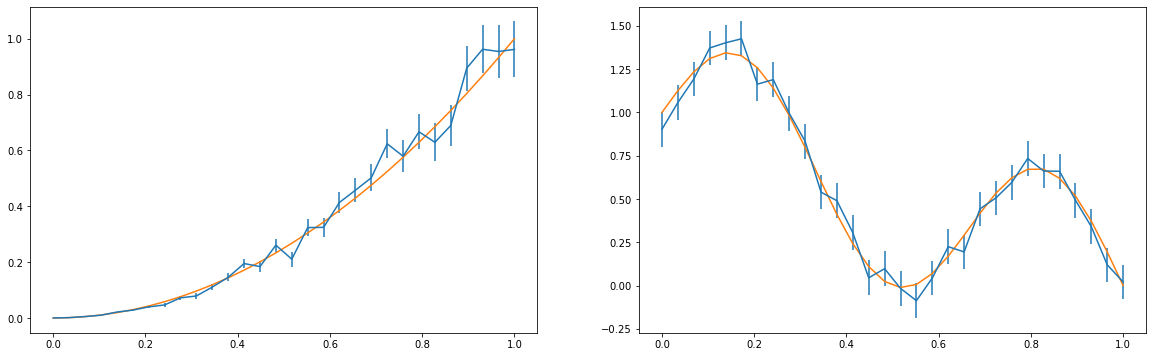

In [5]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
ax[0].errorbar(x, ydata, yerr=(y/10))
ax[0].plot(x, y)

ax[1].errorbar(x, zdata,yerr=0.1)
ax[1].plot(x, z)

In [6]:
D={}
D["x"]=x
D["y"]=ydata
D["z"]=zdata
D["yerr"]=y/10
D["zerr"]=0.1*np.ones_like(z)
D["y0"]=y
D["z0"]=z

In [7]:
df=pd.DataFrame(D)
df.to_csv("data/data1.csv", index=None)

In [8]:
H=pd.read_csv("data/data1.csv")
H.keys()

Index(['x', 'y', 'z', 'yerr', 'zerr', 'y0', 'z0'], dtype='object')

# binary file

In [9]:
np.random.seed(1)
a=np.random.random(size=50)*10
b=np.array([a, np.exp(a)], dtype=np.float32)

In [10]:
b.tofile("data/bin1.bin")
c=np.fromfile("data/bin1.bin", dtype=np.float32).reshape([2,50])

In [12]:
c-b

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)

## Fits file

In [13]:
from astropy.io import fits

In [16]:
f="data/rho_field.fits"

In [18]:
with fits.open(f) as hdul:
    rho = hdul[0].data

In [19]:
np.shape(rho)

(128, 128, 128)

In [24]:
file="data/out_200.trees"
with open(file) as f:
    head=f.readline()
header=head[1:].split()
data_halo=pd.read_csv(file, sep="\s+", comment="#", names=header)

M=data_halo["Mvir(10)"]/1e10
R=data_halo["Rvir(11)"]/1e3
x=data_halo["x(17)"]
y=data_halo["y(18)"]
z=data_halo["z(19)"]
c=R/data_halo["rs(12)"]*1e3

lsub=200/128
ind=np.where((x<lsub)&(M>10**(2.8)))[0]
len(ind)

x_halo=z[ind]
y_halo=y[ind]
R_halo=R[ind]
c_halo=c[ind]

D={}
D["x"]=x_halo
D["y"]=y_halo
D["R"]=R_halo
D["c"]=c_halo

df=pd.DataFrame(D)
df.to_csv("data/halos.csv", index=None, sep=" ")

In [25]:
data_halo.keys()

Index(['scale(0)', 'id(1)', 'desc_scale(2)', 'desc_id(3)', 'num_prog(4)',
       'pid(5)', 'upid(6)', 'desc_pid(7)', 'phantom(8)', 'sam_Mvir(9)',
       'Mvir(10)', 'Rvir(11)', 'rs(12)', 'vrms(13)', 'mmp?(14)',
       'scale_of_last_MM(15)', 'vmax(16)', 'x(17)', 'y(18)', 'z(19)', 'vx(20)',
       'vy(21)', 'vz(22)', 'Jx(23)', 'Jy(24)', 'Jz(25)', 'Spin(26)',
       'Breadth_first_ID(27)', 'Depth_first_ID(28)', 'Tree_root_ID(29)',
       'Orig_halo_ID(30)', 'Snap_idx(31)',
       'Next_coprogenitor_depthfirst_ID(32)',
       'Last_progenitor_depthfirst_ID(33)', 'Last_mainleaf_depthfirst_ID(34)',
       'Tidal_Force(35)', 'Tidal_ID(36)', 'Rs_Klypin(37)', 'Mvir_all(38)',
       'M200b(39)', 'M200c(40)', 'M500c(41)', 'M2500c(42)', 'Xoff(43)',
       'Voff(44)', 'Spin_Bullock(45)', 'b_to_a(46)', 'c_to_a(47)', 'A[x](48)',
       'A[y](49)', 'A[z](50)', 'b_to_a(500c)(51)', 'c_to_a(500c)(52)',
       'A[x](500c)(53)', 'A[y](500c)(54)', 'A[z](500c)(55)', 'T/|U|(56)',
       'M_pe_Behroozi(57)', 